In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

/home/joao/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Linear Regression 

$$\hat{y}=X(X^TX)^{-1}X^Ty$$
$$P\equiv X(X^TX)^{-1}X^T,\;\;P^2=P $$

$P$ therefore represents a probability transition matrix which has the property that
$$\sum_jP_{ij}=1$$

We approximate $$\begin{aligned}y=&E(y|X=x)+\epsilon\\
=&\beta_0+\sum_j X_{j}\beta_j+\epsilon\end{aligned}$$

# Linear Classifier

In [3]:
data=load_iris()

In [6]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
data['data'].shape

(150, 4)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
LR=LogisticRegression()

In [22]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
LR.max_iter=1000

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data['data'],data['target'],test_size=0.2)

In [19]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
accuracy_score(LR.predict(x_test),y_test)

0.9333333333333333

In [21]:
accuracy_score(LR.predict(x_train),y_train)

0.9916666666666667

In [44]:
predictions=np.concatenate((data['data'],LR.predict(data['data']).reshape(150,1)),axis=1)

In [45]:
df_predictions=pd.DataFrame(predictions,columns=['ft1','ft2','ft3','ft4','target'])

In [38]:
df=pd.DataFrame(np.concatenate((data['data'],data['target'].reshape(150,1)),axis=1),columns=['ft1','ft2','ft3','ft4','target'])

In [46]:
df_predictions

,ft1,ft2,ft3,ft4,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [42]:
set(df['target'])

{0.0, 1.0, 2.0}

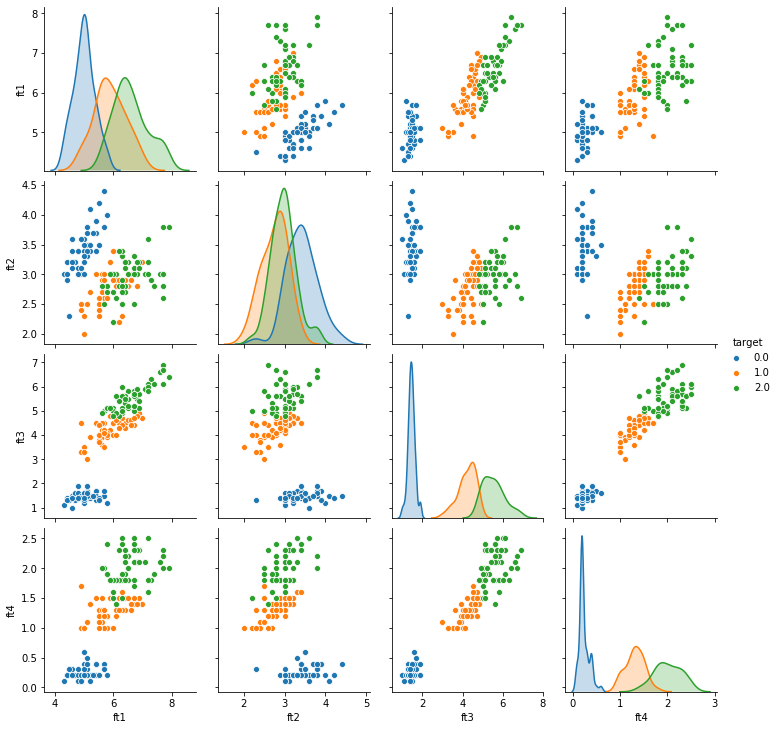

In [47]:
sns.pairplot(data=df_predictions,hue='target')

### Programme it from scratch

In [50]:
LR.coef_

array([[-0.50794315,  0.8336673 , -2.37586009, -1.02752991],
       [ 0.29521078, -0.24822267, -0.19762615, -0.75721056],
       [ 0.21273238, -0.58544463,  2.57348623,  1.78474047]])

$$P(y_k=k|x)=\frac{e^{w_i^kx^i+b^k}}{\sum_ke^{w_i^kx^i+b^k}}$$

# Linear Discriminant Analysis

# Hyperplanes and Support Vector Machines

# Kernel Methods